In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
yield_data = pd.read_excel("2021 Yield.xlsx")

In [4]:
yield_data.head()

,Plot Number,Block,Treatment,Simp. Treatment,Yield (avg; bu/ac),Treatment Description,Short Trt Description
0,1,2,2S,2.0,75.328418,"Corn/Soy, Spring Manure","CS, SM"
1,2,2,6S,6.0,77.482016,"Corn/Soy, Fall Manure","CS, FM"
2,3,2,1C,1.0,232.173281,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,2,3.1,3.1,231.645855,Continuous Corn,CC
4,5,2,4.1,4.1,208.940519,Continuous Corn + PGC,CC + PGC


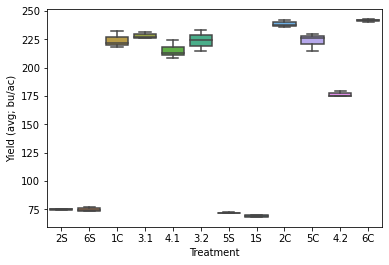

In [5]:
ax = sns.boxplot(x = "Treatment", y = "Yield (avg; bu/ac)", data = yield_data)
plt.savefig('all_yield_box.png')

Including all of the yield data on the same plot doesn't make sense because some treatments are soybeans and some are corn

In [6]:
yield_data.dtypes

Plot Number                int64
Block                      int64
Treatment                 object
Simp. Treatment          float64
Yield (avg; bu/ac)       float64
Treatment Description     object
Short Trt Description     object
dtype: object

In [7]:
yield_data['Treatment'] = yield_data['Treatment'].astype('string')
yield_data.dtypes

Plot Number                int64
Block                      int64
Treatment                 string
Simp. Treatment          float64
Yield (avg; bu/ac)       float64
Treatment Description     object
Short Trt Description     object
dtype: object

Filtering out the soybean treatment data

In [8]:
corn_only = yield_data[yield_data['Treatment'].str.contains('1C|2C|3.1|3.2|4.1|4.2|5C|6C')]
corn_only.head()

,Plot Number,Block,Treatment,Simp. Treatment,Yield (avg; bu/ac),Treatment Description,Short Trt Description
2,3,2,1C,1.0,232.173281,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,2,3.1,3.1,231.645855,Continuous Corn,CC
4,5,2,4.1,4.1,208.940519,Continuous Corn + PGC,CC + PGC
5,6,2,3.2,3.2,223.988531,Continuous Corn + 30 in ISC,CC + 30ISC
10,11,2,2C,2.0,237.683989,"Corn/Soy, Spring Manure","CS, SM"


In [9]:
len(corn_only)

24

Making sure all of the treatments were included. There are 8 treatments with corn growing and each treatment has three reps, so 24 is correct. 

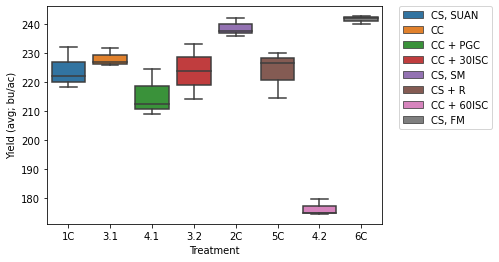

In [10]:
ax = sns.boxplot(x = "Treatment", y = "Yield (avg; bu/ac)", data = corn_only, hue = 'Short Trt Description', dodge = False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('corn_yield_box.jpg', bbox_inches='tight')

In [11]:
soy_only = yield_data[yield_data['Treatment'].str.contains('1S|2S|5S|6S')]
soy_only.head()

,Plot Number,Block,Treatment,Simp. Treatment,Yield (avg; bu/ac),Treatment Description,Short Trt Description
0,1,2,2S,2.0,75.328418,"Corn/Soy, Spring Manure","CS, SM"
1,2,2,6S,6.0,77.482016,"Corn/Soy, Fall Manure","CS, FM"
6,7,3,2S,2.0,75.667936,"Corn/Soy, Spring Manure","CS, SM"
7,8,3,5S,5.0,71.839370,Corn/Soy + Rye,CS + R
8,9,2,5S,5.0,72.610892,Corn/Soy + Rye,CS + R


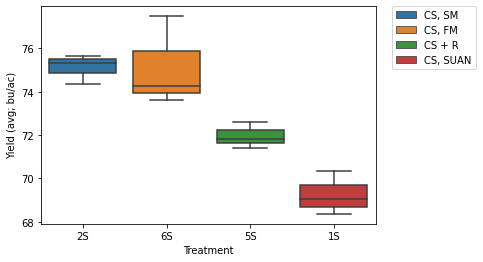

In [12]:
ax = sns.boxplot(x = "Treatment", y = "Yield (avg; bu/ac)", data = soy_only, hue = 'Short Trt Description', dodge = False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('soy_yield_box.jpg', bbox_inches='tight')

In [13]:
corn_only = corn_only.rename(columns={"Yield (avg; bu/ac)": "Yield"})

In [14]:
corn_only.to_excel("Corn_Yield_2021.xlsx")

Saving the corn data as its own spreadsheet in case I want to come back to it 

### Bar Plots

<AxesSubplot:title={'center':'Mean Yield of Corn Treatments'}, xlabel='Treatment'>

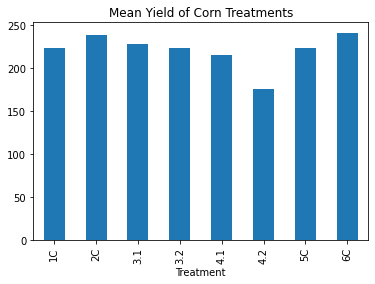

In [15]:
corn_only.groupby('Treatment')['Yield'].describe()['mean'].plot(kind='bar', title = 'Mean Yield of Corn Treatments')

In [16]:
corn_means = pd.DataFrame(corn_only.groupby('Treatment')['Yield'].describe()['mean'])
corn_means = corn_means.reset_index()
corn_means.head()

,Treatment,mean
0,1C,224.195358
1,2C,238.538890
2,3.1,228.115141
3,3.2,223.808229
4,4.1,215.369255


In [17]:
print(corn_means.columns)

Index(['Treatment', 'mean'], dtype='object')


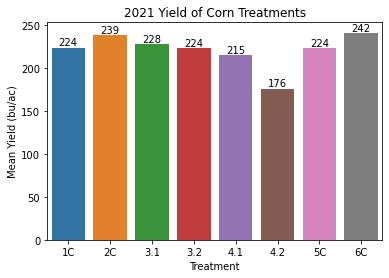

In [18]:
ax = sns.barplot(x = 'Treatment', y = 'mean', data = corn_means)
ax.set_title('2021 Yield of Corn Treatments')
ax.set(xlabel='Treatment', ylabel='Mean Yield (bu/ac)')

#for annotating 
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
plt.savefig('corn_bar.jpg', bbox_inches='tight')

In [19]:
corn_block_means = pd.DataFrame(corn_only.groupby('Block')['Yield'].describe()['mean'])
corn_block_means = corn_block_means.reset_index()
corn_block_means.head()

,Block,mean
0,1,218.087392
1,2,222.997168
2,3,223.295361


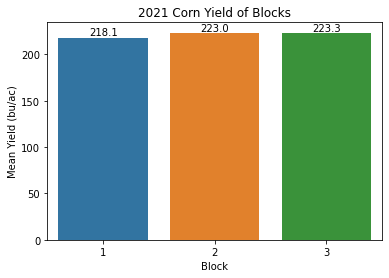

In [20]:
ax = sns.barplot(x = 'Block', y = 'mean', data = corn_block_means)
ax.set_title('2021 Corn Yield of Blocks')
ax.set(xlabel='Block', ylabel='Mean Yield (bu/ac)')

#for annotating 
for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
plt.savefig('corn_block_bar.jpg', bbox_inches='tight')

In [21]:
soy_only.head()

,Plot Number,Block,Treatment,Simp. Treatment,Yield (avg; bu/ac),Treatment Description,Short Trt Description
0,1,2,2S,2.0,75.328418,"Corn/Soy, Spring Manure","CS, SM"
1,2,2,6S,6.0,77.482016,"Corn/Soy, Fall Manure","CS, FM"
6,7,3,2S,2.0,75.667936,"Corn/Soy, Spring Manure","CS, SM"
7,8,3,5S,5.0,71.839370,Corn/Soy + Rye,CS + R
8,9,2,5S,5.0,72.610892,Corn/Soy + Rye,CS + R


In [22]:
soy_only = soy_only.rename(columns={"Yield (avg; bu/ac)": "Yield"})

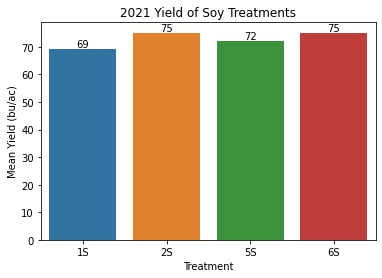

In [23]:
soy_means = pd.DataFrame(soy_only.groupby('Treatment')['Yield'].describe()['mean'])
soy_means = soy_means.reset_index()

ax = sns.barplot(x = 'Treatment', y = 'mean', data = soy_means)
ax.set_title('2021 Yield of Soy Treatments')
ax.set(xlabel='Treatment', ylabel='Mean Yield (bu/ac)')

#for annotating 
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
plt.savefig('soy_bar.jpg', bbox_inches='tight')

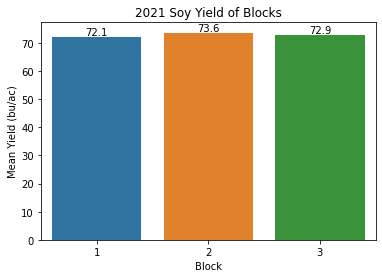

In [24]:
soy_block_means = pd.DataFrame(soy_only.groupby('Block')['Yield'].describe()['mean'])
soy_block_means = soy_block_means.reset_index()

ax = sns.barplot(x = 'Block', y = 'mean', data = soy_block_means)
ax.set_title('2021 Soy Yield of Blocks')
ax.set(xlabel='Block', ylabel='Mean Yield (bu/ac)')

#for annotating 
for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
plt.savefig('soy_block_bar.jpg', bbox_inches='tight')

## ANOVA

In [25]:
corn_only = corn_only.rename(columns={"Simp. Treatment": "simple_treatment"})
corn_only.head()

,Plot Number,Block,Treatment,simple_treatment,Yield,Treatment Description,Short Trt Description
2,3,2,1C,1.0,232.173281,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,2,3.1,3.1,231.645855,Continuous Corn,CC
4,5,2,4.1,4.1,208.940519,Continuous Corn + PGC,CC + PGC
5,6,2,3.2,3.2,223.988531,Continuous Corn + 30 in ISC,CC + 30ISC
10,11,2,2C,2.0,237.683989,"Corn/Soy, Spring Manure","CS, SM"


In [26]:
corn_only

,Plot Number,Block,Treatment,simple_treatment,Yield,Treatment Description,Short Trt Description
2,3,2,1C,1.0,232.173281,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,2,3.1,3.1,231.645855,Continuous Corn,CC
4,5,2,4.1,4.1,208.940519,Continuous Corn + PGC,CC + PGC
5,6,2,3.2,3.2,223.988531,Continuous Corn + 30 in ISC,CC + 30ISC
10,11,2,2C,2.0,237.683989,"Corn/Soy, Spring Manure","CS, SM"
11,12,2,5C,5.0,229.933270,Corn/Soy + Rye,CS + R
12,13,2,4.2,4.2,179.638775,Continuous Corn + 60in ISC,CC + 60ISC
13,14,2,6C,6.0,239.973125,"Corn/Soy, Fall Manure","CS, FM"
16,17,1,5C,5.0,214.635798,Corn/Soy + Rye,CS + R
17,18,1,3.1,3.1,225.744819,Continuous Corn,CC


In [27]:
corn_only_stats = pd.DataFrame(corn_only.groupby('Treatment')['Yield'].describe())
corn_only_stats

,count,mean,std,min,25%,50%,75%,max
Treatment,,,,,,,,
1C,3.0,224.195358,7.133652,218.430571,220.206396,221.982221,227.077751,232.173281
2C,3.0,238.538890,3.175706,235.878142,236.781066,237.683989,239.869263,242.054538
3.1,3.0,228.115141,3.116960,225.744819,226.349784,226.954749,229.300302,231.645855
3.2,3.0,223.808229,9.436566,214.282805,219.135668,223.988531,228.570942,233.153352
4.1,3.0,215.369255,8.163310,208.940519,210.776977,212.613434,218.583622,224.553810
4.2,3.0,176.393698,2.816385,174.586423,174.771159,174.955895,177.297335,179.638775
5C,3.0,223.710907,8.037834,214.635798,220.599726,226.563653,228.248461,229.933270
6C,3.0,241.548313,1.409495,239.973125,240.977202,241.981279,242.335907,242.690536


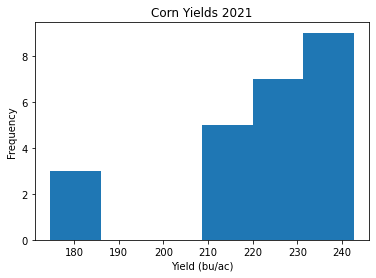

In [28]:
plt.hist(x='Yield', bins = 'auto', data = corn_only)
plt.title("Corn Yields 2021")
plt.xlabel('Yield (bu/ac)')
plt.ylabel('Frequency')
plt.savefig('Corn Histogram.jpg', bbox_inches='tight')

This is not looking very normally distributed. 

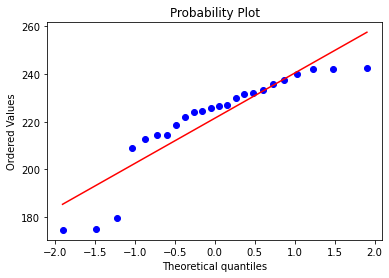

<Figure size 432x288 with 0 Axes>

In [29]:
import scipy.stats as stats
stats.probplot(corn_only['Yield'], dist="norm", plot=plt)
plt.show()
plt.savefig('corn_yield_probplot', bbox_inches='tight')

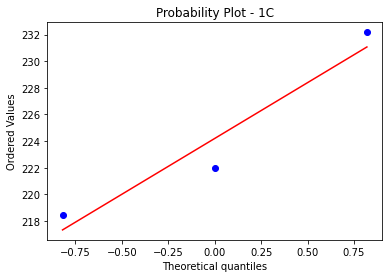

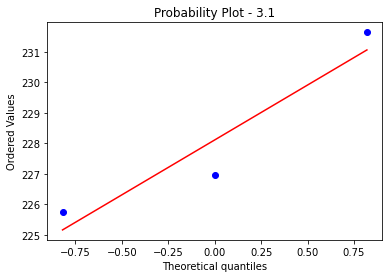

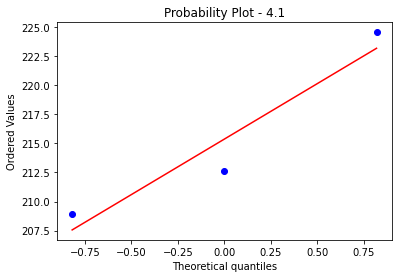

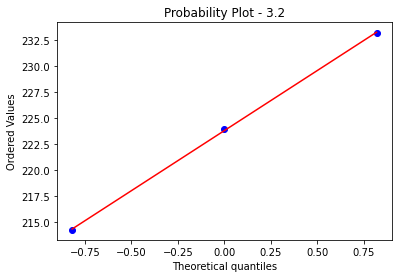

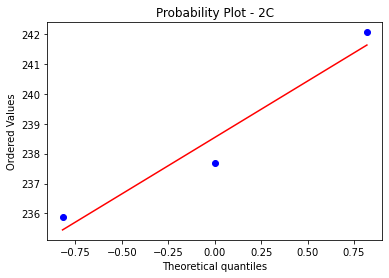

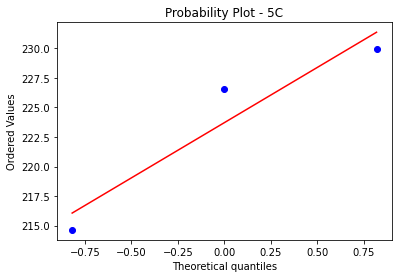

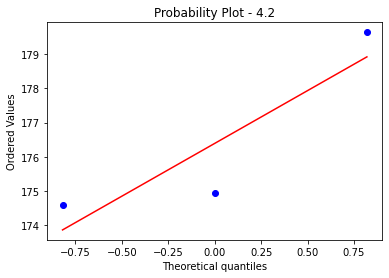

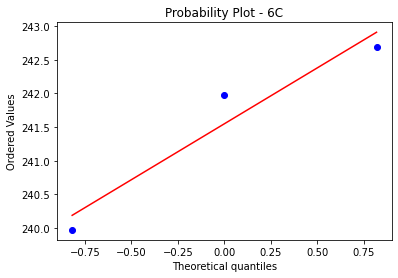

In [30]:
import scipy.stats as stats
unique_treatments = corn_only['Treatment'].unique()
for Treatment in unique_treatments:
    stats.probplot(corn_only[corn_only['Treatment'] == Treatment]['Yield'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  Treatment)
    plt.show()

### Bartlett’s Test of Homogeneity of Variances

Following this tutorial: https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/

Null Hypothesis: the variances are equal across all samples/groups     
Alternative Hypothesis:  the variances are not equal across all samples/groups    

In [31]:
from scipy.stats import bartlett

# subsetting the data:
trt1 = corn_only.query('Treatment == "1C"')['Yield']
trt2 = corn_only.query('Treatment == "2C"')['Yield']
trt31 = corn_only.query('Treatment == "3.1"')['Yield']
trt32 = corn_only.query('Treatment == "3.2"')['Yield']
trt41 = corn_only.query('Treatment == "4.1"')['Yield']
trt42 = corn_only.query('Treatment == "4.2"')['Yield']
trt5 = corn_only.query('Treatment == "5C"')['Yield']
trt6 = corn_only.query('Treatment == "6C"')['Yield']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(trt1, trt2, trt31, trt32, trt41, trt42, trt5, trt6)

# Get the results:
print(stat, p)

8.236102945085667 0.3122358533181093


p-value is high, so assume variances are the same. 

### Levene’s Test of Equality of Variances

In [32]:
from scipy.stats import levene

# Create three arrays for each sample:
trt1 = corn_only.query('Treatment == "1C"')['Yield']
trt2 = corn_only.query('Treatment == "2C"')['Yield']
trt31 = corn_only.query('Treatment == "3.1"')['Yield']
trt32 = corn_only.query('Treatment == "3.2"')['Yield']
trt41 = corn_only.query('Treatment == "4.1"')['Yield']
trt42 = corn_only.query('Treatment == "4.2"')['Yield']
trt5 = corn_only.query('Treatment == "5C"')['Yield']
trt6 = corn_only.query('Treatment == "6C"')['Yield']

# Levene's Test in Python with Scipy:
stat, p = levene(trt1, trt2, trt31, trt32, trt41, trt42, trt5, trt6)

print(stat, p)

0.6584854455470804 0.7032800804487055


Again, p-value is high, so assume variances are the same. 

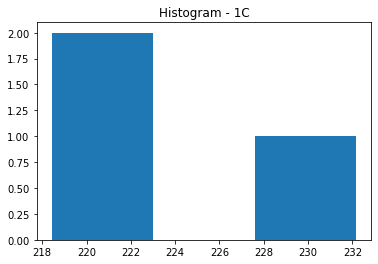

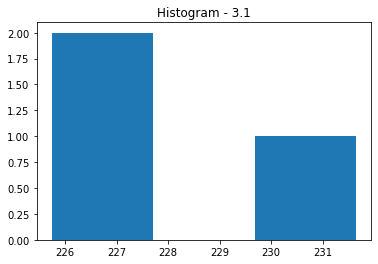

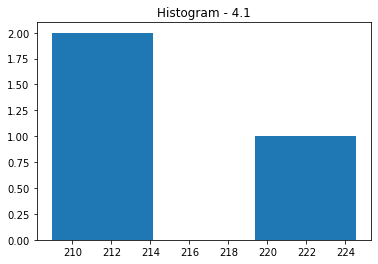

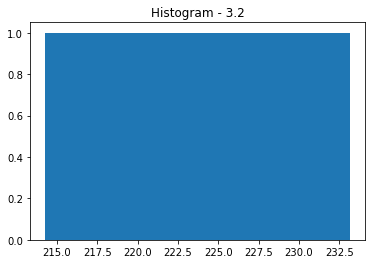

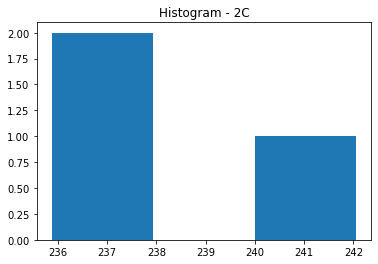

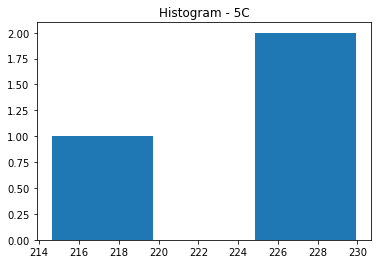

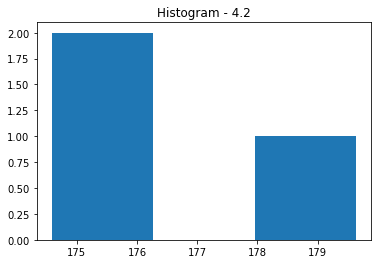

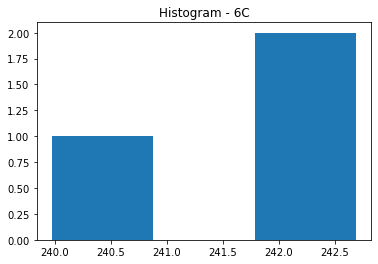

In [33]:
unique_treatments = corn_only['Treatment'].unique()
for Treatment in unique_treatments:
    plt.hist(corn_only[corn_only['Treatment'] == Treatment]['Yield'], bins = 'auto')
    plt.title("Histogram - " +  Treatment)
    plt.show()

### Corn Analysis of Variance

In [34]:


#corn_formula = 'Yield ~C(Block)+C(Treatment)+C(Block):C(Treatment)'

model = ols('Yield ~ C(Block) + C(simple_treatment)', data = corn_only).fit()

aov_table = sm.stats.anova_lm(model)

print(aov_table)



                       df       sum_sq      mean_sq          F        PR(>F)
C(Block)              2.0   136.847333    68.423666   2.060247  1.643259e-01
C(simple_treatment)   7.0  8476.954203  1210.993458  36.463195  6.190045e-08
Residual             14.0   464.959492    33.211392        NaN           NaN


It looks like block does not have a significant effect (p = 0.164), but treatment does (p < 0.05).

In [35]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     28.82
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.60e-07
Time:                        10:31:44   Log-Likelihood:                -69.621
No. Observations:                  24   AIC:                             159.2
Df Residuals:                      14   BIC:                             171.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [36]:

model = ols('Yield ~ C(Block) + C(simple_treatment) + C(Block):C(simple_treatment)', data = corn_only).fit()

aov_table = sm.stats.anova_lm(model)

print(aov_table)


                                df        sum_sq      mean_sq    F  PR(>F)
C(Block)                       2.0  1.368473e+02    68.423666  0.0     NaN
C(simple_treatment)            7.0  8.476954e+03  1210.993458  0.0     NaN
C(Block):C(simple_treatment)  14.0  4.649595e+02    33.211392  0.0     NaN
Residual                       0.0  1.723024e-24          inf  NaN     NaN


C:\ProgramData\Anaconda3.0\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


## Mean Comparisons Attempt

In [38]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

sp.posthoc_ttest(corn_only, val_col='Yield', group_col='Treatment', p_adjust='holm')

,1C,3.1,4.1,3.2,2C,5C,4.2,6C
1C,1.000000,1.000000,1.000000,1.000000,0.484020,1.000000,0.010440,0.260172
3.1,1.000000,1.000000,0.749633,1.000000,0.261491,1.000000,0.000743,0.051264
4.1,1.000000,0.749633,1.000000,1.000000,0.193260,1.000000,0.031795,0.108431
3.2,1.000000,1.000000,1.000000,1.000000,0.749633,1.000000,0.025992,0.484020
2C,0.484020,0.261491,0.193260,0.749633,1.000000,0.533972,0.000388,1.000000
5C,1.000000,1.000000,1.000000,1.000000,0.533972,1.000000,0.015651,0.309376
4.2,0.010440,0.000743,0.031795,0.025992,0.000388,0.015651,1.000000,0.000101
6C,0.260172,0.051264,0.108431,0.484020,1.000000,0.309376,0.000101,1.000000


In [39]:
sp.posthoc_conover(corn_only, val_col='Yield', group_col='Treatment', p_adjust='holm')

,1C,2C,3.1,3.2,4.1,4.2,5C,6C
1C,1.000000,0.116421,1.000000,1.000000,1.000000,0.116421,1.000000,0.042947
2C,0.116421,1.000000,0.463083,0.116421,0.005629,0.000280,0.116421,1.000000
3.1,1.000000,0.463083,1.000000,1.000000,0.320955,0.021985,1.000000,0.173516
3.2,1.000000,0.116421,1.000000,1.000000,1.000000,0.116421,1.000000,0.042947
4.1,1.000000,0.005629,0.320955,1.000000,1.000000,1.000000,1.000000,0.001881
4.2,0.116421,0.000280,0.021985,0.116421,1.000000,1.000000,0.096701,0.000105
5C,1.000000,0.116421,1.000000,1.000000,1.000000,0.096701,1.000000,0.049750
6C,0.042947,1.000000,0.173516,0.042947,0.001881,0.000105,0.049750,1.000000


In [43]:
corn_only_no60 = corn_only[corn_only['Treatment'].str.contains('1C|2C|3.1|3.2|4.1|5C|6C')]

model = ols('Yield ~ C(Block) + C(simple_treatment)', data = corn_only_no60).fit()

aov_table = sm.stats.anova_lm(model)

print(aov_table)

                       df       sum_sq     mean_sq         F    PR(>F)
C(Block)              2.0   143.759534   71.879767  1.950678  0.184707
C(simple_treatment)   6.0  1513.631179  252.271863  6.846172  0.002433
Residual             12.0   442.183244   36.848604       NaN       NaN


In [44]:
sp.posthoc_ttest(corn_only_no60, val_col='Yield', group_col='Treatment', p_adjust='holm')

,1C,3.1,4.1,3.2,2C,5C,6C
1C,1.000000,1.000000,1.000000,1.000000,0.484020,1.000000,0.260172
3.1,1.000000,1.000000,0.749633,1.000000,0.261491,1.000000,0.051264
4.1,1.000000,0.749633,1.000000,1.000000,0.193260,1.000000,0.108431
3.2,1.000000,1.000000,1.000000,1.000000,0.749633,1.000000,0.484020
2C,0.484020,0.261491,0.193260,0.749633,1.000000,0.533972,1.000000
5C,1.000000,1.000000,1.000000,1.000000,0.533972,1.000000,0.309376
6C,0.260172,0.051264,0.108431,0.484020,1.000000,0.309376,1.000000


### Soy ANOVA

In [37]:
soy_only = soy_only.rename(columns={"Simp. Treatment": "simple_treatment"})
soy_only.head()

,Plot Number,Block,Treatment,simple_treatment,Yield,Treatment Description,Short Trt Description
0,1,2,2S,2.0,75.328418,"Corn/Soy, Spring Manure","CS, SM"
1,2,2,6S,6.0,77.482016,"Corn/Soy, Fall Manure","CS, FM"
6,7,3,2S,2.0,75.667936,"Corn/Soy, Spring Manure","CS, SM"
7,8,3,5S,5.0,71.839370,Corn/Soy + Rye,CS + R
8,9,2,5S,5.0,72.610892,Corn/Soy + Rye,CS + R


In [38]:
soy_only_stats = pd.DataFrame(soy_only.groupby('Treatment')['Yield'].describe())
soy_only_stats

,count,mean,std,min,25%,50%,75%,max
Treatment,,,,,,,,
1S,3.0,69.256568,1.013542,68.365015,68.705382,69.045750,69.702345,70.358940
2S,3.0,75.123919,0.670094,74.375402,74.851910,75.328418,75.498177,75.667936
5S,3.0,71.951712,0.610807,71.404874,71.622122,71.839370,72.225131,72.610892
6S,3.0,75.131992,2.060390,73.635658,73.956980,74.278302,75.880159,77.482016


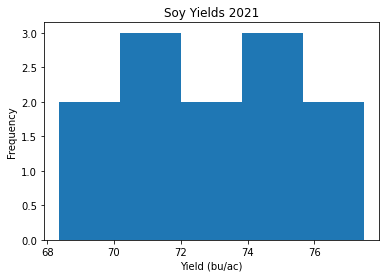

In [40]:
plt.hist(x='Yield', bins = 'auto', data = soy_only)
plt.title("Soy Yields 2021")
plt.xlabel('Yield (bu/ac)')
plt.ylabel('Frequency')
plt.savefig('Soy Histogram.jpg', bbox_inches='tight')

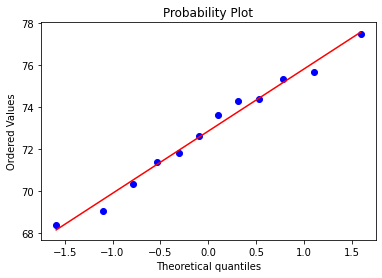

<Figure size 432x288 with 0 Axes>

In [46]:
import scipy.stats as stats
stats.probplot(soy_only['Yield'], dist="norm", plot=plt)
plt.show()

plt.savefig('soy_yield_probplot', bbox_inches='tight')

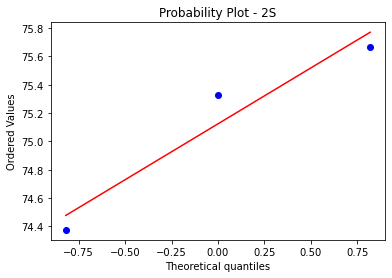

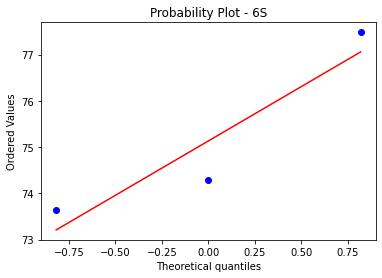

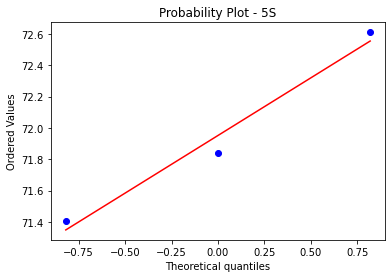

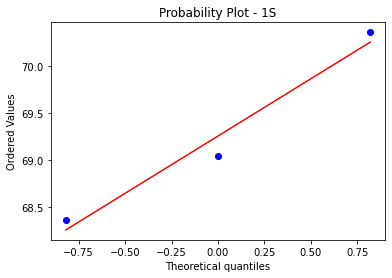

In [42]:
import scipy.stats as stats
unique_treatments = soy_only['Treatment'].unique()
for Treatment in unique_treatments:
    stats.probplot(soy_only[soy_only['Treatment'] == Treatment]['Yield'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  Treatment)
    plt.show()

In [43]:
from scipy.stats import bartlett

# subsetting the data:
trt2 = soy_only.query('Treatment == "2S"')['Yield']
trt1 = soy_only.query('Treatment == "1S"')['Yield']
trt5 = soy_only.query('Treatment == "5S"')['Yield']
trt6 = soy_only.query('Treatment == "6S"')['Yield']


# Bartlett's test in Python with SciPy:
stat, p = bartlett(trt1, trt2, trt5, trt6)

# Get the results:
print(stat, p)

3.3076242408562706 0.3465829012906225


In [44]:

model = ols('Yield ~ C(Block) + C(simple_treatment)', data = soy_only).fit()

aov_table = sm.stats.anova_lm(model)

print(aov_table)



                      df     sum_sq    mean_sq          F    PR(>F)
C(Block)             2.0   4.565992   2.282996   1.796885  0.244617
C(simple_treatment)  3.0  72.290509  24.096836  18.965972  0.001830
Residual             6.0   7.623180   1.270530        NaN       NaN


Again, no effect from block, but treatments do have an effect. 

https://medium.com/budding-data-scientist/data-analytics-using-python-part-6-9e740a1dd681

In [ ]:
from patsy.contrasts import Treatment

levels = [1, 2, 3, 4]
contrast = Treatment(reference=0).code_without_intercept(levels)
print(contrast.matrix)


https://www.pythonfordatascience.org/mixed-effects-regression-python/

https://pbgworks.org/sites/pbgworks.org/files/RandomizedCompleteBlockDesignTutorial.pdf